In [52]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt

#Split data in 80%/10%/10% (train/validation/test) sets
valid_set_size_percentage = 10
test_set_size_percentage = 10

#display parent directory and working directory
print(os.path.dirname(os.getcwd()) + ":", os.listdir(os.path.dirname(os.getcwd())))
print(os.getcwd()+':', os.listdir(os.getcwd()))

/Users/thanhvy/python: ['NY-stock-price-prediction', 'housing-price-prediction']
/Users/thanhvy/python/NY-stock-price-prediction: ['prices-split-adjusted.csv', 'fundamentals.csv', 'python_1.ipynb']


In [53]:
#Import all stock prices
df = pd.read_csv('prices-split-adjusted.csv', index_col= 0)

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])
df.tail()
df.describe()
df.info()


number of different stocks:  501
['CVX', 'LVLT', 'PPG', 'ATVI', 'NLSN', 'DAL', 'F', 'MRO', 'SBUX', 'APD']
<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


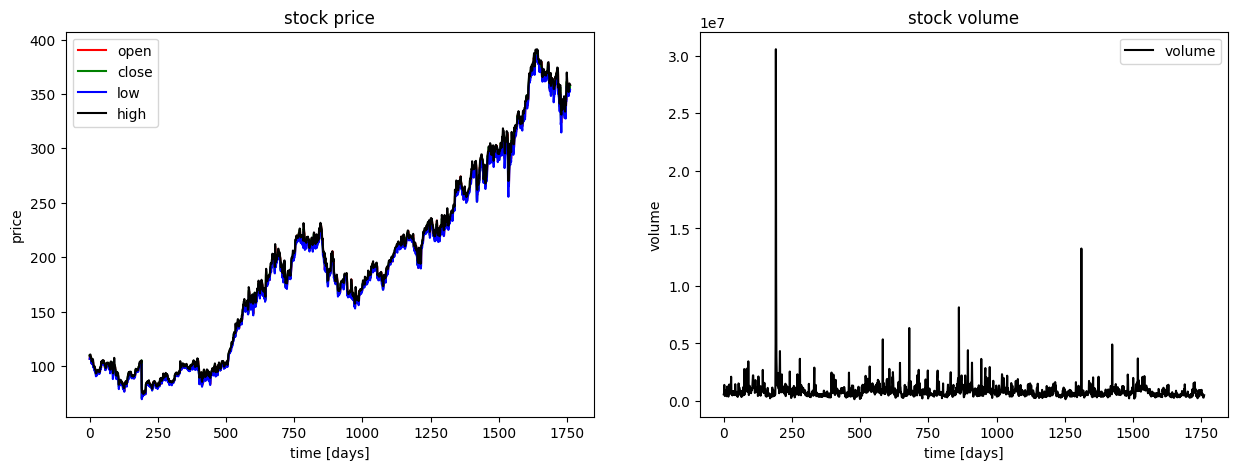

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2)
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')

In [55]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = np.array(stock)
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]))
    test_set_size= int(np.round(test_set_size_percentage/100*data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_valid = data[train_set_size : train_set_size + valid_set_size, :-1, :]
    y_valid = data[train_set_size : train_set_size + valid_set_size, -1, :]

    x_test = data[train_set_size + valid_set_size :, :-1, :]
    y_test = data[train_set_size + valid_set_size :, -1, :]

    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

#Choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
# df_stock.drop(['symbol'],1,inplace=True)
# df_stock.drop(['volume'], 1, inplace=True)
df_stock.head()

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

#Normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

#Create train, test data
seq_len = 20

x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['symbol', 'open', 'close', 'low', 'high', 'volume']
x_train.shape =  (1394, 19, 6)
y_train.shape =  (1394, 6)
x_valid.shape =  (174, 19, 6)
y_valid.shape =  (174, 6)
x_test.shape =  (174, 19, 6)
y_test.shape =  (174, 6)


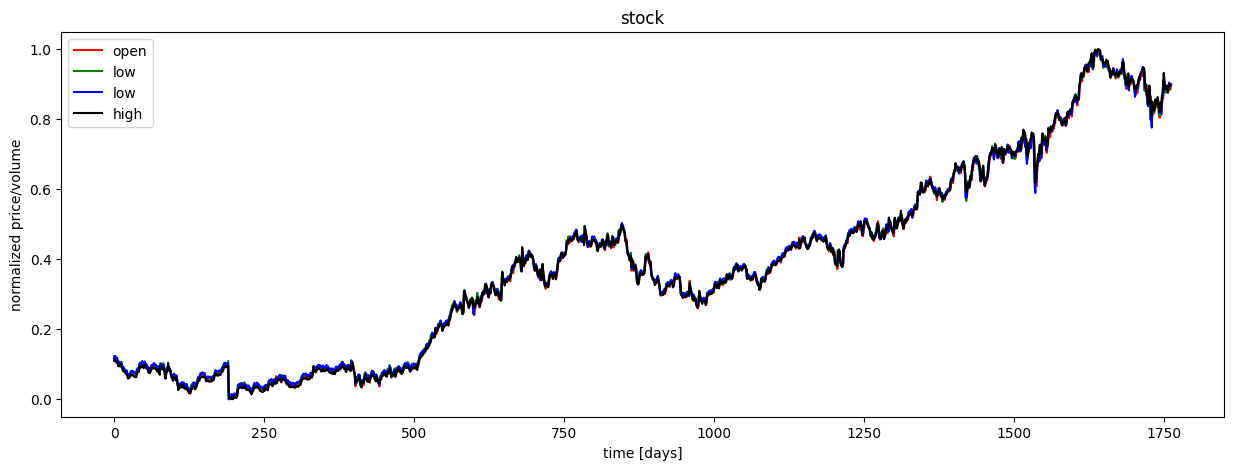

In [56]:
plt.figure(figsize=(15, 5))
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()